In [1]:
import shutil
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import os 
import sys
import matplotlib.pyplot as plt
import pandas as pd
from pyDOE import lhs
%load_ext autoreload
%autoreload 2
import time


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
tfm = tfp.models

In [3]:
inputs = np.loadtxt('./test_Data/X.txt')

In [4]:
outputs = np.loadtxt('./test_Data/Y.txt')

In [5]:
print(inputs.shape)

(100, 4)


In [6]:
labels = ['u1','u2', 'u3','u4']

In [7]:
model = tfm.BGP_model(inputs, outputs, kernel_type = 'RBF', noise_level = 1e-2, labels = labels)

In [8]:
sampling_info = model.run_mcmc(mcmc_samples = 8000, num_leapfrog_steps = 3, estimate_noise = False, warm_up = True)

Noise variance is fixed.
Excecuting the warmup.
Warmup: 
Warm-Up Iteration:   0 Acceptance Rate: 1.000
Warm-Up Iteration: 500 Acceptance Rate: 0.611
Warm-Up Iteration: 1000 Acceptance Rate: 0.596
Warm-Up Iteration: 1500 Acceptance Rate: 0.594
Warm-Up Iteration: 2000 Acceptance Rate: 0.590
Warm-Up Iteration: 2500 Acceptance Rate: 0.586
Warm-Up Iteration: 3000 Acceptance Rate: 0.584
Warm-Up Iteration: 3500 Acceptance Rate: 0.583
Warm-Up Iteration: 3999 Acceptance Rate: 0.581
Sampling in progress.


W0228 21:57:18.734389 139896567772928 deprecation.py:323] From /root/.local/lib/python3.5/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bayesiangp.py:234: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Acceptance rate of the HMC sampling: 0.88825


In [9]:
model = tfm.BGP_model(inputs, outputs, kernel_type = 'RBF', noise_level = 1e-2, labels = labels, sampling_info = sampling_info)

Retrieving hyperparameter samples


In [10]:
model.plot_chains(directory_path  = './')

In [11]:
mean_pos, std_pos, samples = model.predict(inputs, with_point_samples = True)

In [12]:
lower = np.percentile(samples,2.5, axis = 0)
upper = np.percentile(samples,97.5, axis = 0)

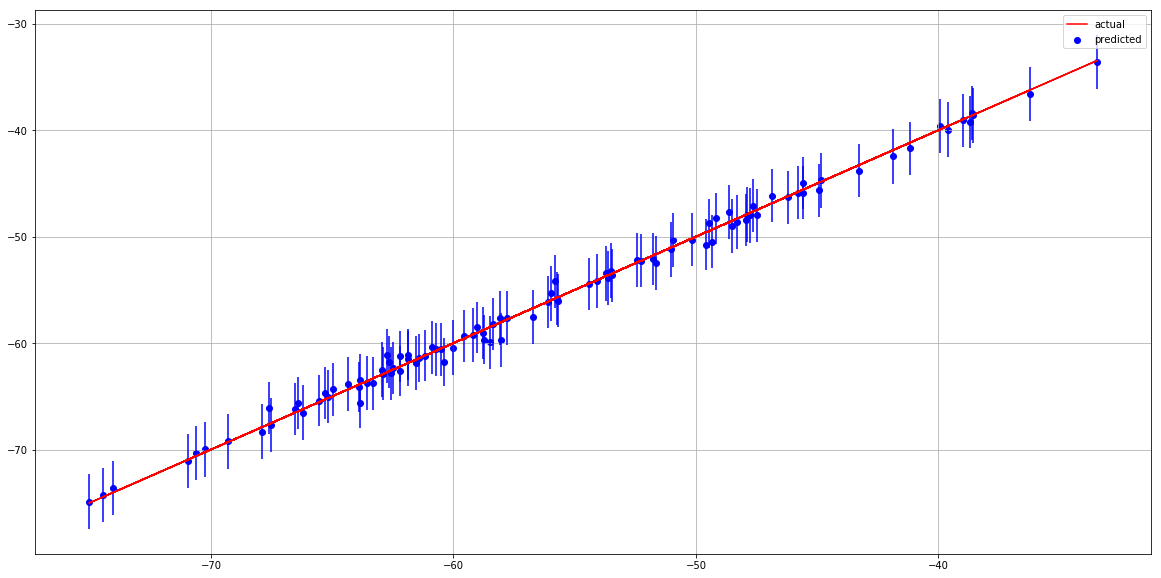

In [13]:
# Predicted vs actual
plt.figure(figsize =(20,10))
plt.plot(outputs, outputs , color = 'red', label ='actual')
plt.scatter(outputs, mean_pos, color = 'blue', label = 'predicted')
plt.vlines(outputs,lower, upper, color = 'blue')
plt.legend()
plt.grid()